## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  32.898505   661.457292  0.475615  4.281900  1.477318
1  17.609722  1268.106243  0.603690  8.266647  1.654197
2  15.827741   760.860840  0.794539  9.234133  1.612128
3  22.682322  1090.774935  0.905262  2.675093  1.269851
4   3.346591   545.793653  0.091807  6.919118  1.400093


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9105049	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9030043	total: 58.5ms	remaining: 29.2s
2:	learn: 0.8917578	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8835277	total: 59.3ms	remaining: 14.8s
4:	learn: 0.8729786	total: 59.8ms	remaining: 11.9s
5:	learn: 0.8647218	total: 60.2ms	remaining: 9.98s
6:	learn: 0.8595425	total: 60.5ms	remaining: 8.59s
7:	learn: 0.8506002	total: 61ms	remaining: 7.56s
8:	learn: 0.8410015	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8314576	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8248491	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8172869	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8090782	total: 63.3ms	remaining: 4.8s
13:	learn: 0.8017054	total: 63.6ms	remaining: 4.48s
14:	learn: 0.7928517	total: 64.3ms	remaining: 4.22s
15:	learn: 0.7847341	total: 64.8ms	remaining: 3.99s
16:	learn: 0.7773107	total: 65.2ms	remaining: 3.77s
17:	learn: 0.7709933	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7640727	total: 66.3ms	remaining: 3

135:	learn: 0.3468397	total: 118ms	remaining: 751ms
136:	learn: 0.3454072	total: 119ms	remaining: 748ms
137:	learn: 0.3438396	total: 119ms	remaining: 744ms
138:	learn: 0.3422401	total: 120ms	remaining: 741ms
139:	learn: 0.3408875	total: 120ms	remaining: 737ms
140:	learn: 0.3396664	total: 121ms	remaining: 734ms
141:	learn: 0.3379751	total: 121ms	remaining: 730ms
142:	learn: 0.3363886	total: 121ms	remaining: 726ms
143:	learn: 0.3348334	total: 122ms	remaining: 723ms
144:	learn: 0.3331563	total: 122ms	remaining: 719ms
145:	learn: 0.3316700	total: 122ms	remaining: 715ms
146:	learn: 0.3301082	total: 123ms	remaining: 712ms
147:	learn: 0.3287396	total: 123ms	remaining: 709ms
148:	learn: 0.3271361	total: 123ms	remaining: 705ms
149:	learn: 0.3256538	total: 124ms	remaining: 702ms
150:	learn: 0.3240952	total: 124ms	remaining: 699ms
151:	learn: 0.3227789	total: 125ms	remaining: 695ms
152:	learn: 0.3214100	total: 125ms	remaining: 693ms
153:	learn: 0.3200807	total: 126ms	remaining: 690ms
154:	learn: 

296:	learn: 0.1949245	total: 185ms	remaining: 438ms
297:	learn: 0.1944124	total: 185ms	remaining: 437ms
298:	learn: 0.1938092	total: 186ms	remaining: 436ms
299:	learn: 0.1934668	total: 186ms	remaining: 435ms
300:	learn: 0.1930413	total: 187ms	remaining: 434ms
301:	learn: 0.1923819	total: 187ms	remaining: 433ms
302:	learn: 0.1920564	total: 188ms	remaining: 432ms
303:	learn: 0.1913261	total: 188ms	remaining: 431ms
304:	learn: 0.1909522	total: 189ms	remaining: 430ms
305:	learn: 0.1905399	total: 189ms	remaining: 429ms
306:	learn: 0.1898539	total: 190ms	remaining: 428ms
307:	learn: 0.1893997	total: 190ms	remaining: 427ms
308:	learn: 0.1887937	total: 191ms	remaining: 426ms
309:	learn: 0.1881618	total: 191ms	remaining: 425ms
310:	learn: 0.1879208	total: 191ms	remaining: 424ms
311:	learn: 0.1876294	total: 192ms	remaining: 423ms
312:	learn: 0.1871061	total: 192ms	remaining: 422ms
313:	learn: 0.1867049	total: 193ms	remaining: 421ms
314:	learn: 0.1861187	total: 193ms	remaining: 420ms
315:	learn: 

554:	learn: 0.0966436	total: 299ms	remaining: 240ms
555:	learn: 0.0963449	total: 300ms	remaining: 239ms
556:	learn: 0.0962717	total: 300ms	remaining: 239ms
557:	learn: 0.0959663	total: 301ms	remaining: 238ms
558:	learn: 0.0958475	total: 301ms	remaining: 237ms
559:	learn: 0.0956369	total: 301ms	remaining: 237ms
560:	learn: 0.0953464	total: 302ms	remaining: 236ms
561:	learn: 0.0952740	total: 302ms	remaining: 236ms
562:	learn: 0.0950670	total: 303ms	remaining: 235ms
563:	learn: 0.0949516	total: 303ms	remaining: 234ms
564:	learn: 0.0945719	total: 303ms	remaining: 234ms
565:	learn: 0.0942742	total: 304ms	remaining: 233ms
566:	learn: 0.0939929	total: 304ms	remaining: 232ms
567:	learn: 0.0937909	total: 305ms	remaining: 232ms
568:	learn: 0.0936588	total: 305ms	remaining: 231ms
569:	learn: 0.0933804	total: 306ms	remaining: 231ms
570:	learn: 0.0933089	total: 306ms	remaining: 230ms
571:	learn: 0.0930177	total: 307ms	remaining: 229ms
572:	learn: 0.0929470	total: 307ms	remaining: 229ms
573:	learn: 

708:	learn: 0.0663053	total: 366ms	remaining: 150ms
709:	learn: 0.0661998	total: 367ms	remaining: 150ms
710:	learn: 0.0661087	total: 367ms	remaining: 149ms
711:	learn: 0.0659953	total: 367ms	remaining: 149ms
712:	learn: 0.0659054	total: 368ms	remaining: 148ms
713:	learn: 0.0654870	total: 368ms	remaining: 148ms
714:	learn: 0.0654380	total: 369ms	remaining: 147ms
715:	learn: 0.0651100	total: 369ms	remaining: 146ms
716:	learn: 0.0650635	total: 369ms	remaining: 146ms
717:	learn: 0.0648051	total: 370ms	remaining: 145ms
718:	learn: 0.0647576	total: 370ms	remaining: 145ms
719:	learn: 0.0645544	total: 371ms	remaining: 144ms
720:	learn: 0.0644668	total: 371ms	remaining: 144ms
721:	learn: 0.0644196	total: 372ms	remaining: 143ms
722:	learn: 0.0643354	total: 372ms	remaining: 143ms
723:	learn: 0.0642888	total: 373ms	remaining: 142ms
724:	learn: 0.0642025	total: 373ms	remaining: 142ms
725:	learn: 0.0641564	total: 374ms	remaining: 141ms
726:	learn: 0.0641108	total: 374ms	remaining: 140ms
727:	learn: 

972:	learn: 0.0364038	total: 480ms	remaining: 13.3ms
973:	learn: 0.0363043	total: 481ms	remaining: 12.8ms
974:	learn: 0.0361728	total: 481ms	remaining: 12.3ms
975:	learn: 0.0361615	total: 482ms	remaining: 11.8ms
976:	learn: 0.0361503	total: 482ms	remaining: 11.4ms
977:	learn: 0.0360529	total: 483ms	remaining: 10.9ms
978:	learn: 0.0359407	total: 483ms	remaining: 10.4ms
979:	learn: 0.0358754	total: 484ms	remaining: 9.87ms
980:	learn: 0.0358646	total: 484ms	remaining: 9.38ms
981:	learn: 0.0358538	total: 485ms	remaining: 8.88ms
982:	learn: 0.0357596	total: 485ms	remaining: 8.39ms
983:	learn: 0.0356501	total: 485ms	remaining: 7.89ms
984:	learn: 0.0355873	total: 486ms	remaining: 7.4ms
985:	learn: 0.0355769	total: 486ms	remaining: 6.9ms
986:	learn: 0.0355156	total: 486ms	remaining: 6.41ms
987:	learn: 0.0355054	total: 487ms	remaining: 5.91ms
988:	learn: 0.0354953	total: 487ms	remaining: 5.42ms
989:	learn: 0.0353661	total: 488ms	remaining: 4.92ms
990:	learn: 0.0353561	total: 488ms	remaining: 4.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


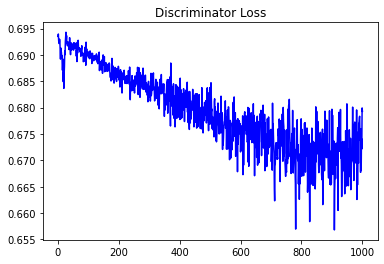

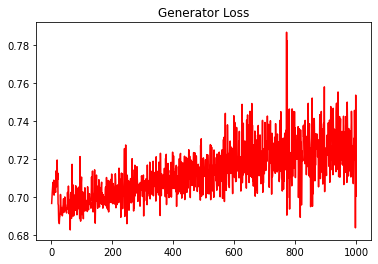

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20758294890738796


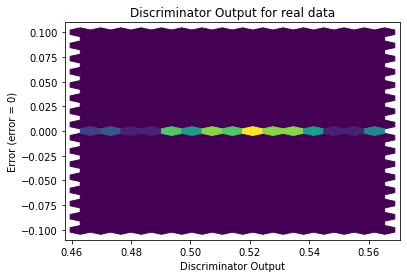

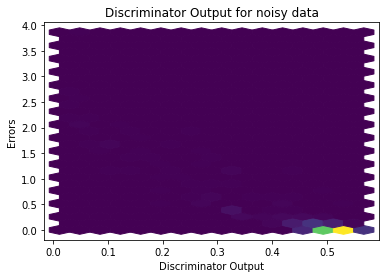

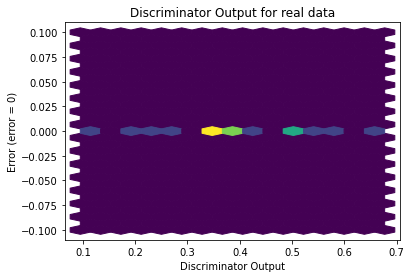

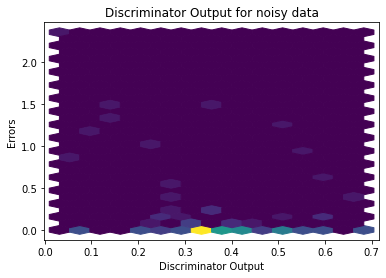

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3071]], requires_grad=True)
